#  Modelling the Central Dogma in E.coli



**What is the central dogma of molecular biology?**

The central dogma was first introduced by Francis Crick in the 1950s. Broadly speaking it describes the process by which information stored in DNA is used as a template by the cell to build proteins. These proteins form the molecular machinery which perform many of the important cellular functions vital to life.

The chemical processes that underly the central dogma can be descrided to an arbitrary level of complexity and can vary in different species. In the examples herein we will be keeping our biochemistry as simple as possible and focusing on the coupled transcription-translation form of the central dogma in *Escherichia Coli* - probably the most common bacteria used in wet labs.


**Deoxyribonucleic Acid (DNA)**

![DNAUrl](https://upload.wikimedia.org/wikipedia/commons/0/0c/DNA_animation.gif "dna")

DNA is made up of two chains of nucleotide molecules (polynucleotides) which are corkcrewed around one another into the famous double helix structure. Polynucleotides are composed of bases which exist in 4 types - Adenine (A), Cytosine (C), Guanine (G) and Thymine (T). The 4 bases form 2 complementary pairs A-T and C-G. If A is present at some position on one polynucleotide then T is present at the same position on the other polynucleotide. It is the ordering of these bases which encodes the genetic information. 

Suppose we know the sequences of bases on one polynucleotide and wish to know the complementary sequence we can use a simple python function to automate this task.


**Basic Programming Ideas**

Before we introduce our complementary DNA function we need to explain some basic programming concepts. Just as we did in the realm of biochemistry we will keep any explanations of programming ideas here as simple (and hopefully hence as accessible) as possible.

In [2]:
#Variables

#A variable is a container which stores some data. 
#Variables have different types which dictate the kinds of operations one can carry out on the data they contain. 

#Create a variable of type string (roughly analagous to text) called bases and store in it the data ATCG

bases = "ATCG" #Note the "" surrounding our text denoting the string data type

#Create a variable of type integer (a whole number) called base_count and store in it the number 4

base_count = 4

#Create a variable of type float (number with decimal places) called fraction and store in it the number 0.5

fraction = 0.5

#Lists

#We can even have variables of type list which contain multiple instances of other variables

#Create a list containing the variable we have created so far called all_vars.

all_vars = [bases, base_count, fraction]

#We can display the content of all_vars using print.

print(all_vars)

['ATCG', 4, 0.5]


With our basic grasp of variables we can now create the complement function.

In [5]:
#Function

#A function is a self contained block of code which performs some task and runs only when it is called by name.
def complement(dna_sequence): #In python a function is defined using the keyword def. Here our function name is complement and we give it as input the the variable dna_sequence.
  dna_complement = '' #Create a blank string variable to contain the answer of the complement problem.
  for base in dna_sequence: #Imagine our string as a list in which each character is a seperate entry. We move through the list examining each character one-by-one. This is a loop.
    if base == 'A': #If the current character is A then add its complement T to our answer
      dna_complement = dna_complement + 'T'
    elif base == 'T': #Elif abreviates Else if used to delineate subsequent options for the other bases and their complements
      dna_complement = dna_complement + 'A'
    elif base == 'C':
      dna_complement = dna_complement + 'G'
    elif base == 'G':
      dna_complement = dna_complement + 'C'
  return dna_complement #return sends the answer from our function back to where the function was called

comp_answer = complement(bases) #call our complement function on the bases variable we made before and store the answer in the variable comp answer

print(comp_answer) #display the complement

TAGC


**Ribonucleic Acid (RNA)**

![RNAPUrl](https://i2.wp.com/www.artofthecell.com/wp-content/uploads/2014/10/Art-of-the-Cell-RNA-Polymerase.gif?ssl=1 "RNAP")

The creation of the RNA molecule by transcription of DNA is the intermediate step in the central dogma between DNA and protein. RNA is also a polynucleotide however there are two core differences from DNA. First RNA is composed of a single polynucleotide chain. Secondly the T base in DNA is replaced with Uracil (U) in RNA. Transcription of the RNA molecule is carried out by RNA polymerase (RNAP, the yellow 'blob' in the GIF above). RNAP is a molecular machine made from protein which travels along the DNA strand like a train track. RNAP reads a strand of DNA as it travels and 'builds' an RNA molecule by means of the base pairing rules A-U and C-G.

For readers who are very new to programming it may be helpful at this point to use the complementary DNA example to create a transcription function which takes a DNA sequence and outputs the RNA transcript.

**Protein**

https://thumbs.gfycat.com/BlandRichAlbertosaurus-mobile.mp4

Proteins consist of chains of amino acids. There are 20 different amino acids used by *E.coli* naturally. Proteins are used to build the molecular machines which carry out cellular functions. The form of each protein is defined by the amino acid sequence and the chemical interactions between proteins making up a molecular machine define the function for that machine. Amino acid chains are constructed by the ribosome which translates an RNA molecule. Each group of 3 RNA bases is called a codon and has a matching amino acid, multiple codons can code for a single amino acid. 


**Modelling using Ordinary Differential Equations**

Now that we have a basic understanding of the biology involved we can examine a mathematical representation of the central dogma.

A differential equation denotes the change in a variable at a certain time point. Consider two variables - the number of RNA molecules coding for a protein and the number of molecules of protein. 

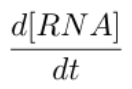

Denotes the change in the number of RNA molecules at time t. 

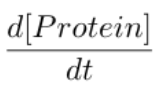

Denotes the change in the number of protein molecules at time t.

Consider based on our knowledge of the central dogma what factors change the number of RNA and Protein molecules at a single point in time. 

RNA is transcribed from the DNA by the RNA polymerase. In *E.coli* the RNA polymerase moves over the DNA strand at a rate of approximately 3600 nucleotides per second [http://book.bionumbers.org/]. The length in nucleotides of our gene divided by this rate becomes our transcription rate denoted $k_{1}$. The number of times per minute that the RNAP can trancribe the DNA and produce an RNA molecule.

RNA molecules do not stick around the cell forever, over time they will decay. The average halflife of an *E.coli* RNA is around 5 minutes. The decay rate of RNA is hence log(2)/5. The RNA decay rate is denoted $\gamma_{1}$.

Considering these additive and subtractive factors to the number of RNA molecules we can obtain the equation:

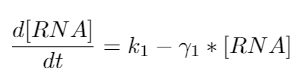

Protein is translated from the RNA by the ribosome. In *E.coli* the ribosome can add amino acids together to build protein at a rate of 1200 amino acids per minute. This rate divided by the protein length in amino acids is the translation rate denoted $k_{2}$. 

Just like RNA, protein molecules do not stick around the cell forever, over time they will decay. The average effective halflife of an *E.coli* protein is around 20 minutes. The decay rate of protein is hence log(2)/20. The protein decay rate is denoted $\gamma_{2}$.

Considering these additive and subtractive factors to the number of protein molecules we can obtain the equation:

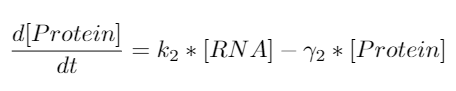

Given this set of equations and the initial numbers of RNA and protein molecules we can construct what is known as an initial value problem. Many functions exist in python to solve these initial value problems. For the purposes of this tutorial we'll simply consider the operations of these solvers as a magic black box which takes in our equations, rates and initial molecule counts and gives us the number of RNA and protein molecules over a time span we define.

Next we will show how all of this can be set up in python.


In [6]:
from math import log #imports give us access to pre-written functions that do not exist in python by default, we want the logarithm function which exists in the math library

#Define variables containing all the rates we need in our equations

transcription_rate = (3600./258.) #our hypothetical protein's gene is 258 nucleotides long
rna_deg_rate = log(2)/(5)
translation_rate = (1200./86.) #our hypothetical protein is 83 amino acids long, 258/3 = 86
protein_deg_rate = log(2)/(20)

In [8]:
def system(y, t): #a function containing our model equations, inputs are y a list containing the number of rna and protein molecules and t the time point
     rna = y[0]
     protein = y[1]
     #the model equations 
     d_rna_dt = transcription_rate - (rna_deg_rate * rna)
     d_protein_dt = (translation_rate * rna) - (protein_deg_rate * protein)
     return [d_rna_dt, d_protein_dt]

#Note: we will never directly interact with this function, the format is dictated by our 'magic black box' ode system solver and is hence somewhat arbitrary

In [10]:
from scipy.integrate import odeint #get the solver function odeint from the integrate section of the scipy library

#Define the initial numbers of RNA and Protein
init_rna = 0.
init_protein = 0.
init_conditions = [init_rna, init_protein]
time = list(range((24*60) - 1)) # we wish to run our model over a 24hr time period

#solve
result = odeint(system, init_conditions, time) #give the solver function odeint the system function, starting conditions and time span and store the ressults in a variable called result
rnas_over_time = result[:, 0] #a list containing the number of rna molecules every minute for 24 hours
proteins_over_time = result[:, 1] #a list containing the number of protein molecules every minute for 24 hours

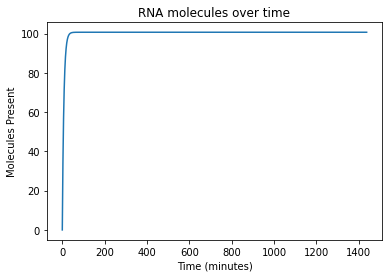

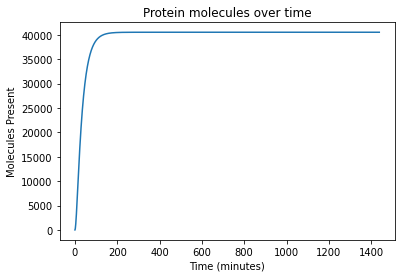

In [15]:
#Now lets make some nice graphs of the results

import matplotlib.pyplot as plt # matplotlib library lets us make graphs we'd like to refer to it by the name plt

plt.title('RNA molecules over time')
plt.plot(time, rnas_over_time) #line graph
plt.ylabel('Molecules Present')
plt.xlabel('Time (minutes)')
plt.show() #display graph

plt.title('Protein molecules over time')
plt.plot(time, proteins_over_time) #line graph
plt.ylabel('Molecules Present')
plt.xlabel('Time (minutes)')
plt.show() #display graph